In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter # 범례 텍스트 수정을 위한 라이브러리
import os # 현재 작업 디렉토리 확인을 위한 라이브러리

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

print("Setup Complete")

Setup Complete


In [3]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
meta_filepath = os.path.join(current_directory, 'my', './hs_meta.csv')

# 데이터 불러오기
meta_data = pd.read_csv(meta_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Winrate'] = meta_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Popular'] = meta_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
meta_data['Games'] = meta_data['Games'].str.replace(',', '').astype('int')

# 데이터 헤드 출력
meta_data.head()

,Hero,Deck,Winrate,Popular,Games
0,죽음의 기사,부정 죽음의 기사,32.4,10.1,13000
1,죽음의 기사,Plague Death Knight,56.6,5.2,6800
2,죽음의 기사,혈기 죽음의 기사,35.9,2.1,2700
3,죽음의 기사,냉기 죽음의 기사,45.1,0.7,980
4,죽음의 기사,Rainbow Death Knight,50.6,0.6,740


In [5]:
# 직업별 총 점유율 계산
hero_popular_total = meta_data.groupby('Hero')['Popular'].sum().reset_index()

# 총 점유율이 큰 순서로 직업 정렬
hero_popular_total = hero_popular_total.sort_values(by='Popular', ascending=True)

# 직업 순서를 기준으로 hero 열을 categorical 변수로 변환
hero_order = hero_popular_total['Hero'].tolist()
meta_data['Hero'] = pd.Categorical(meta_data['Hero'], categories=hero_order, ordered=True)

# 정렬된 직업 순서를 기준으로 원본 데이터프레임 정렬
deck_total = meta_data.sort_values(by=['Hero', 'Popular'], ascending=[True, False])

# '기타'가 포함된 경우 뒤에 직업 이름 추가하여 '덱' 수정
deck_total['Deck'] = deck_total.apply(lambda row: f"{row['Deck']} {row['Hero']}" if '기타' in row['Deck'] else row['Deck'], axis=1)

# 결과 확인
deck_total.head()

,Hero,Deck,Winrate,Popular,Games
45,주술사,하이랜더 주술사,63.2,1.9,2500
46,주술사,토템 주술사,56.4,0.5,650
49,주술사,기타 주술사,22.6,0.5,710
47,주술사,정령 주술사,53.8,0.3,420
48,주술사,자연 주술사,47.4,0.2,210


In [6]:
# 각 덱에 대한 유사한 색깔 지정
deck_colors = {
    'Plague Death Knight': 'darkslategray',
    '부정 죽음의 기사': 'teal',
    '혈기 죽음의 기사': 'darkcyan',
    '냉기 죽음의 기사': 'cadetblue',
    'Rainbow Death Knight': 'cyan',
    'Highlander Blood Death Knight': 'lightcyan',
    '기타 죽음의 기사': 'crimson',
    '어그로 악마사냥꾼': 'lightseagreen',
    '빅 악마사냥꾼': 'turquoise',
    '하이랜더 악마사냥꾼': 'aquamarine',
    '유물 악마사냥꾼': 'lime',
    '기타 악마사냥꾼': 'crimson',
    '용 드루이드': 'saddlebrown',
    '하이랜더 드루이드': 'brown',
    '나무정령 드루이드': 'chocolate',
    '기타 드루이드': 'crimson',
    '사냥개 사냥꾼': 'olive',
    '비전 사냥꾼': 'yellowgreen',
    '하이랜더 사냥꾼': 'green',
    '기타 사냥꾼': 'crimson',
    'Rainbow Mage': 'steelblue',
    'Mining Mage': 'dodgerblue',
    '비밀 마법사': 'deepskyblue',
    'Spooky Mage': 'skyblue',
    '정령 마법사': 'lightskyblue',
    '하이랜더 마법사': 'lightblue',
    'Lightshow Mage': 'cadetblue',
    '기계 마법사': 'aqua',
    '기타 마법사': 'crimson',
    '어그로 성기사': 'darkgoldenrod',
    'Showdown Paladin': 'goldenrod',
    '하이랜더 성기사': 'yellow',
    '신병 성기사': 'orange',
    'Earthen Paladin': 'khaki',
    '기타 성기사': 'crimson',
    '컨트롤 사제': 'dimgray',
    '언데드 사제': 'gray',
    '하이랜더 사제': 'darkgray',
    'Automaton Priest': 'slategray',
    'Ogre Priest': 'lightcyan',
    '기타 사제': 'crimson',
    'Mining Rogue': 'black',
    'Wishing Rogue': 'dimgray',
    'Ogre Rogue': 'gray',
    'Mech Rogue': 'darkgray',
    'Big Rogue': 'silver',
    '미라클 도적': 'lightgray',
    '비밀 도적': 'thistle',
    '기타 도적': 'crimson',
    '하이랜더 주술사': 'blue',
    '토템 주술사': 'blue',
    '정령 주술사': 'skyblue',
    '자연 주술사': 'darkblue',
    '기타 주술사': 'crimson',
    'Mining Warlock': 'indigo',
    '타디우스 흑마법사': 'darkviolet',
    '저주 흑마법사': 'purple',
    'Sludge Warlock': 'violet',
    '하이랜더 흑마법사': 'plum',
    '기타 흑마법사': 'crimson',
    '컨트롤 전사': 'coral',
    '격노 전사': 'red',
    '도발 전사': 'darkred',
    '하이랜더 전사': 'brown',
    "Rock 'n' Roll Warrior": 'salmon',
    '기타 전사': 'crimson',
}

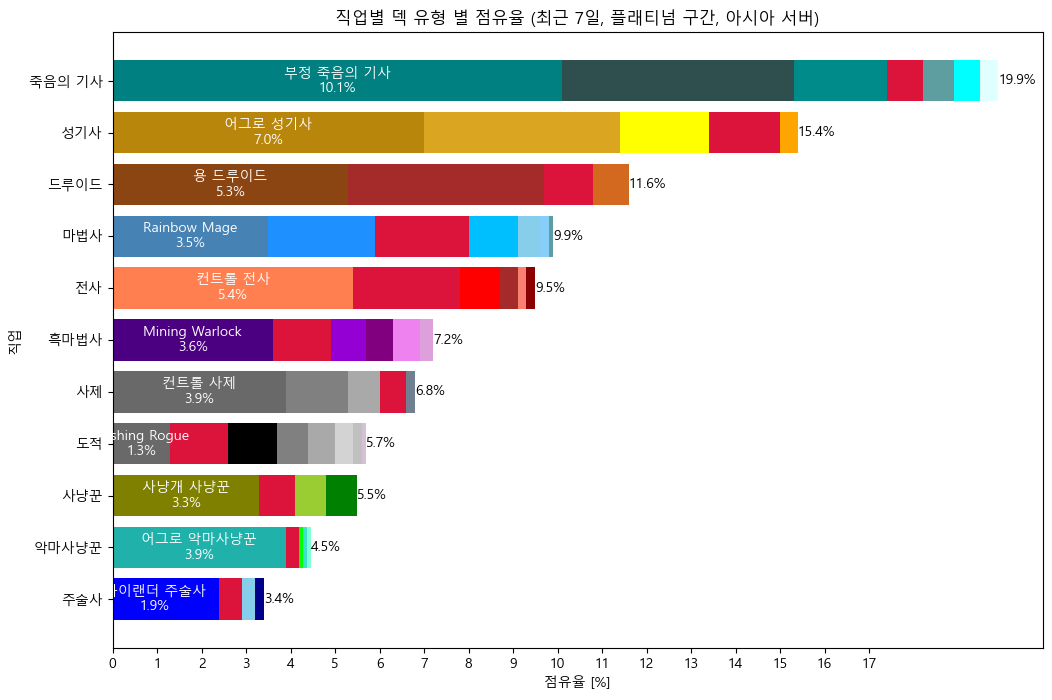

In [9]:
# 직업별로 덱 유형의 점유율을 누적으로 변환
deck_total['Cumulative_Popular'] = deck_total.groupby(['Hero'])['Popular'].cumsum()

# Seaborn을 사용하여 누적 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 덱에 대해 누적 막대 그래프 그리기
for i, deck in enumerate(deck_total['Deck'].unique()):
    # 현재 덱에 대한 데이터 추출
    current_deck_data = deck_total[deck_total['Deck'] == deck]

    # 막대 그래프 그리기
    plt.barh(
        current_deck_data['Hero'],
        current_deck_data['Popular'],
        label=deck,
        color=deck_colors[deck],
        left=current_deck_data['Cumulative_Popular'] - current_deck_data['Popular']
    )

#직업별 가장 높은 점유율을 가진 덱 정보 가져오기
max_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Popular'].idxmax()])
total_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Cumulative_Popular'].idxmax()])

# 직업별로 가장 높은 점유율을 가진 덱 정보에 대한 범례 추가
for index, row in max_popular_row.iterrows():
    plt.text(row['Cumulative_Popular']/2, row['Hero'],
             f"{row['Deck']}\n{row['Popular']:.1f}%",
             color='white', ha='center', va='center')

# 직업별로 총 점유율 정보에 대한 범례 추가
for index, row in total_popular_row.iterrows():
    plt.text(row['Cumulative_Popular'], row['Hero'],
             f"{row['Cumulative_Popular']:.1f}%",
             color='black', ha='left', va='center')

plt.xticks(range(0, 18))
plt.title("직업별 덱 유형 별 점유율 (최근 7일, 플래티넘 구간, 아시아 서버)")
plt.xlabel("점유율 [%]")
plt.ylabel("직업")
plt.legend().set_visible(False)

plt.show()

In [10]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
matchup_filepath = os.path.join(current_directory, 'all', './hs_matchups.csv')

# 데이터 불러오기
matchup_data = pd.read_csv(matchup_filepath, index_col=0)

def convert_to_numeric(value):
    # '%' 제거 후 숫자로 변환, 에러가 발생하면 NaN 반환
    try:
        return float(value.rstrip('%'))
    except ValueError:
        return float('nan')

# '%'로 끝나는 열에 대해 함수 적용
matchup_data = matchup_data.applymap(convert_to_numeric)
matchup_data.head()

,Plague Death Knight,용 드루이드,어그로 성기사,컨트롤 전사,Mining Warlock,하이랜더 드루이드,부정 죽음의 기사,사냥개 사냥꾼,Showdown Paladin,Rainbow Mage,어그로 악마사냥꾼,Unnamed: 12,컨트롤 사제,혈기 죽음의 기사
Plague Death Knight,NaN,40.65,37.11,56.93,46.41,60.74,63.51,39.98,39.25,48.14,50.34,61.51,65.69,64.65
용 드루이드,59.34,NaN,30.89,58.24,56.85,49.89,76.40,51.31,30.45,60.21,61.13,63.49,54.78,72.01
어그로 성기사,62.88,69.10,NaN,68.44,62.75,73.90,65.12,63.59,44.39,56.19,49.54,73.12,72.27,74.70
컨트롤 전사,43.06,41.75,31.55,NaN,35.88,35.59,64.31,44.06,42.62,51.73,48.79,59.66,60.37,69.63
Mining Warlock,53.58,43.14,37.24,64.11,NaN,43.73,65.35,45.22,44.73,51.66,43.65,66.15,62.51,70.01


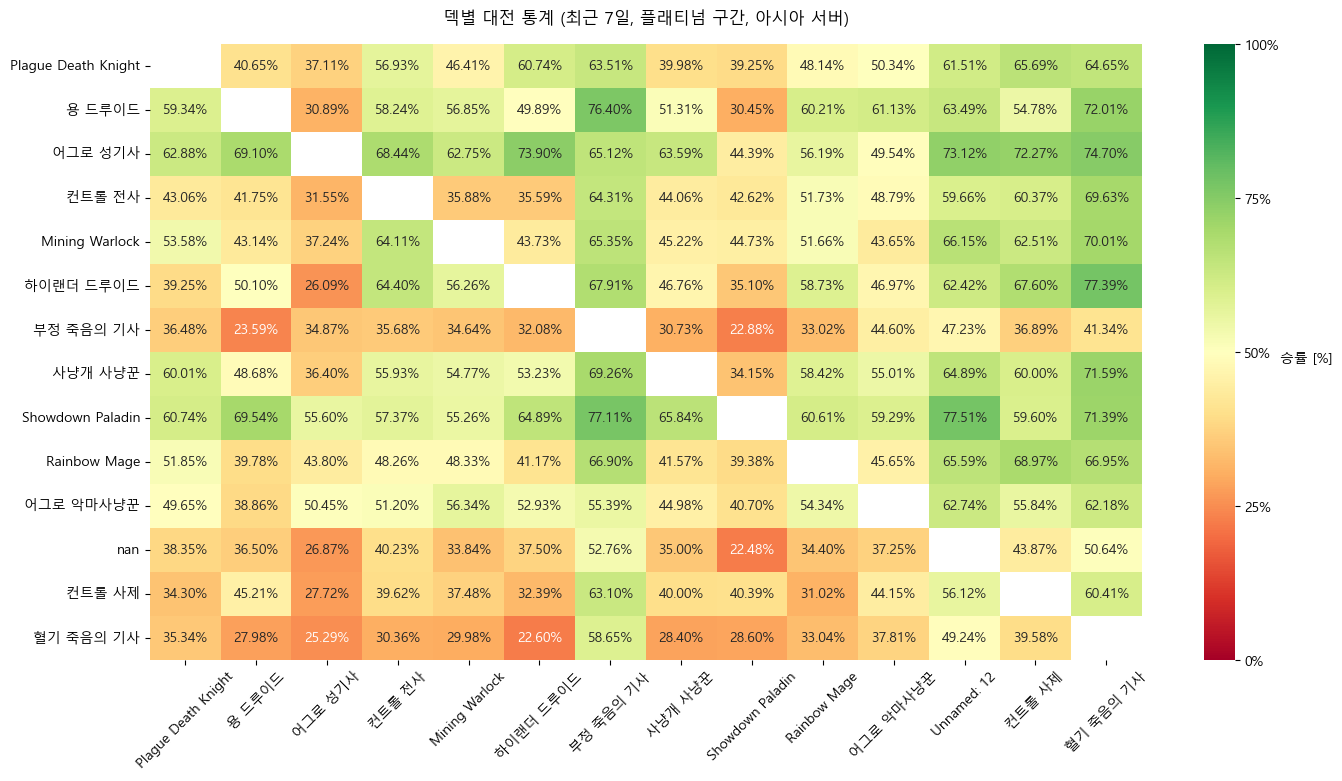

In [12]:
# 셀의 크기 조절
plt.figure(figsize=(16, 8)) 

heatmap = sns.heatmap(data=matchup_data, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=100, annot_kws={"size": 10})

# 각 텍스트 레이블에 퍼센트 추가
for text in heatmap.texts:
    text.set_text(f"{text.get_text()}%")

# 오른쪽 범례에 각 숫자에 '%' 추가
cbar = heatmap.collections[0].colorbar
cbar.set_label('승률 [%]', rotation=0, labelpad=20)
# FuncFormatter를 사용하여 범례 각 숫자에 '%' 추가
cbar.set_ticks([0, 25, 50, 75, 100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
cbar.formatter = FuncFormatter(lambda x, pos: f"{int(x)}%")
cbar.update_ticks()


plt.title("덱별 대전 통계 (최근 7일, 플래티넘 구간, 아시아 서버)", pad=15)
plt.xticks(rotation=45)
plt.show()